In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from pathlib import Path

INPUT_DIRECTORY = Path("/data/parquet/04-pivoted")
parquet_files = sorted(list(INPUT_DIRECTORY.glob("*.parquet")))
num_files = 60

# read all files and store in one dataframe
df = pd.concat(
    [pd.read_parquet(f) for f in
     tqdm(parquet_files[:(num_files if num_files else len(parquet_files))], desc="Lade Parquet-Dateien")],
    ignore_index=True)
print(f"Anzahl Zeilen: {len(df)}")  # 1152795704
print(f"Anzahl Spalten: {len(df.columns)}")  # 19


Lade Parquet-Dateien: 100%|██████████| 60/60 [00:01<00:00, 41.16it/s]


Anzahl Zeilen: 9166090
Anzahl Spalten: 42


In [2]:
df.describe()

,snapshot_times,delivery_start,price_1_ask,price_2_ask,price_3_ask,price_4_ask,price_5_ask,price_6_ask,price_7_ask,price_8_ask,...,quantity_1_bid,quantity_2_bid,quantity_3_bid,quantity_4_bid,quantity_5_bid,quantity_6_bid,quantity_7_bid,quantity_8_bid,quantity_9_bid,quantity_10_bid
count,9337127,9337127,9.335262e+06,9.333798e+06,9.332900e+06,9.331862e+06,9.330696e+06,9.328850e+06,9.325705e+06,9.321270e+06,...,9.336925e+06,9.336228e+06,9.335322e+06,9.334305e+06,9.333142e+06,9.330846e+06,9.327739e+06,9.322903e+06,9.314839e+06,9.304939e+06
mean,2023-07-05 08:02:41.007710976,2023-07-05 10:31:26.134913792,9.582985e+01,9.649681e+01,9.739180e+01,9.849724e+01,1.002694e+02,1.028000e+02,1.062302e+02,1.105087e+02,...,4.422493e+00,3.593360e+00,3.395953e+00,3.530008e+00,3.733426e+00,3.944344e+00,4.141357e+00,4.324214e+00,4.512432e+00,4.713488e+00
min,2023-02-28 18:00:00,2023-02-28 23:00:00,-1.100000e+03,-1.000000e+03,-9.000000e+02,-8.651500e+02,-8.523500e+02,-8.523400e+02,-7.102000e+02,-7.100000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2023-05-01 06:14:20,2023-05-01 09:00:00,7.700000e+01,7.739000e+01,7.770000e+01,7.804000e+01,7.849000e+01,7.899000e+01,7.959000e+01,8.003000e+01,...,1.000000e+00,8.000000e-01,8.000000e-01,9.000000e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.400000e+00,1.800000e+00
50%,2023-07-04 06:32:50,2023-07-04 09:00:00,9.865000e+01,9.899000e+01,9.925000e+01,9.960000e+01,9.997000e+01,1.003300e+02,1.009100e+02,1.015800e+02,...,3.600000e+00,2.900000e+00,2.400000e+00,2.800000e+00,3.000000e+00,3.900000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
75%,2023-09-08 00:09:00,2023-09-08 03:00:00,1.187900e+02,1.191600e+02,1.196600e+02,1.200000e+02,1.207500e+02,1.216700e+02,1.228000e+02,1.241600e+02,...,6.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
max,2023-11-09 09:55:00,2023-11-09 10:00:00,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,...,4.974000e+02,8.020000e+02,5.191000e+02,4.050000e+02,4.055000e+02,4.055000e+02,6.120000e+02,8.001000e+02,5.065000e+02,5.065000e+02
std,NaN,NaN,6.335173e+01,7.169752e+01,8.747542e+01,1.021460e+02,1.236074e+02,1.531576e+02,1.876445e+02,2.223031e+02,...,4.897224e+00,4.256452e+00,4.186939e+00,4.270710e+00,4.471247e+00,4.558806e+00,4.728226e+00,4.941330e+00,5.092906e+00,5.321411e+00


In [2]:
sus = (df[df["price_2_ask"] == 9999])

In [6]:
# Index(['snapshot_times', 'delivery_start', 'price_1_ask', 'price_2_ask',
#      'price_3_ask', 'price_4_ask', 'price_5_ask', 'price_6_ask',
#      'price_7_ask', 'price_8_ask', 'price_9_ask', 'price_10_ask',
#      'price_1_bid', 'price_2_bid', 'price_3_bid', 'price_4_bid',
#      'price_5_bid', 'price_6_bid', 'price_7_bid', 'price_8_bid',
#      'price_9_bid', 'price_10_bid', 'quantity_1_ask', 'quantity_2_ask',
#      'quantity_3_ask', 'quantity_4_ask', 'quantity_5_ask', 'quantity_6_ask',
#      'quantity_7_ask', 'quantity_8_ask', 'quantity_9_ask', 'quantity_10_ask',
#      'quantity_1_bid', 'quantity_2_bid', 'quantity_3_bid', 'quantity_4_bid',
#      'quantity_5_bid', 'quantity_6_bid', 'quantity_7_bid', 'quantity_8_bid',
#      'quantity_9_bid', 'quantity_10_bid'],

# plot facetgrid with hist of every price column
import seaborn as sns
import matplotlib.pyplot as plt

price_columns = [col for col in df.columns if col.startswith("price_")]
quantity_columns = [col for col in df.columns if col.startswith("quantity_")]

# melt the dataframe to long format for price columns
df_price_melted = df.melt(id_vars=["snapshot_times", "delivery_start"],
                          value_vars=price_columns,
                          var_name="price_level",
                          value_name="price")

# winsorize the price column to remove extreme outliers
df_price_melted["price"] = df_price_melted["price"].clip(lower=df_price_melted["price"].quantile(0.01),
                                                         upper=df_price_melted["price"].quantile(0.99))

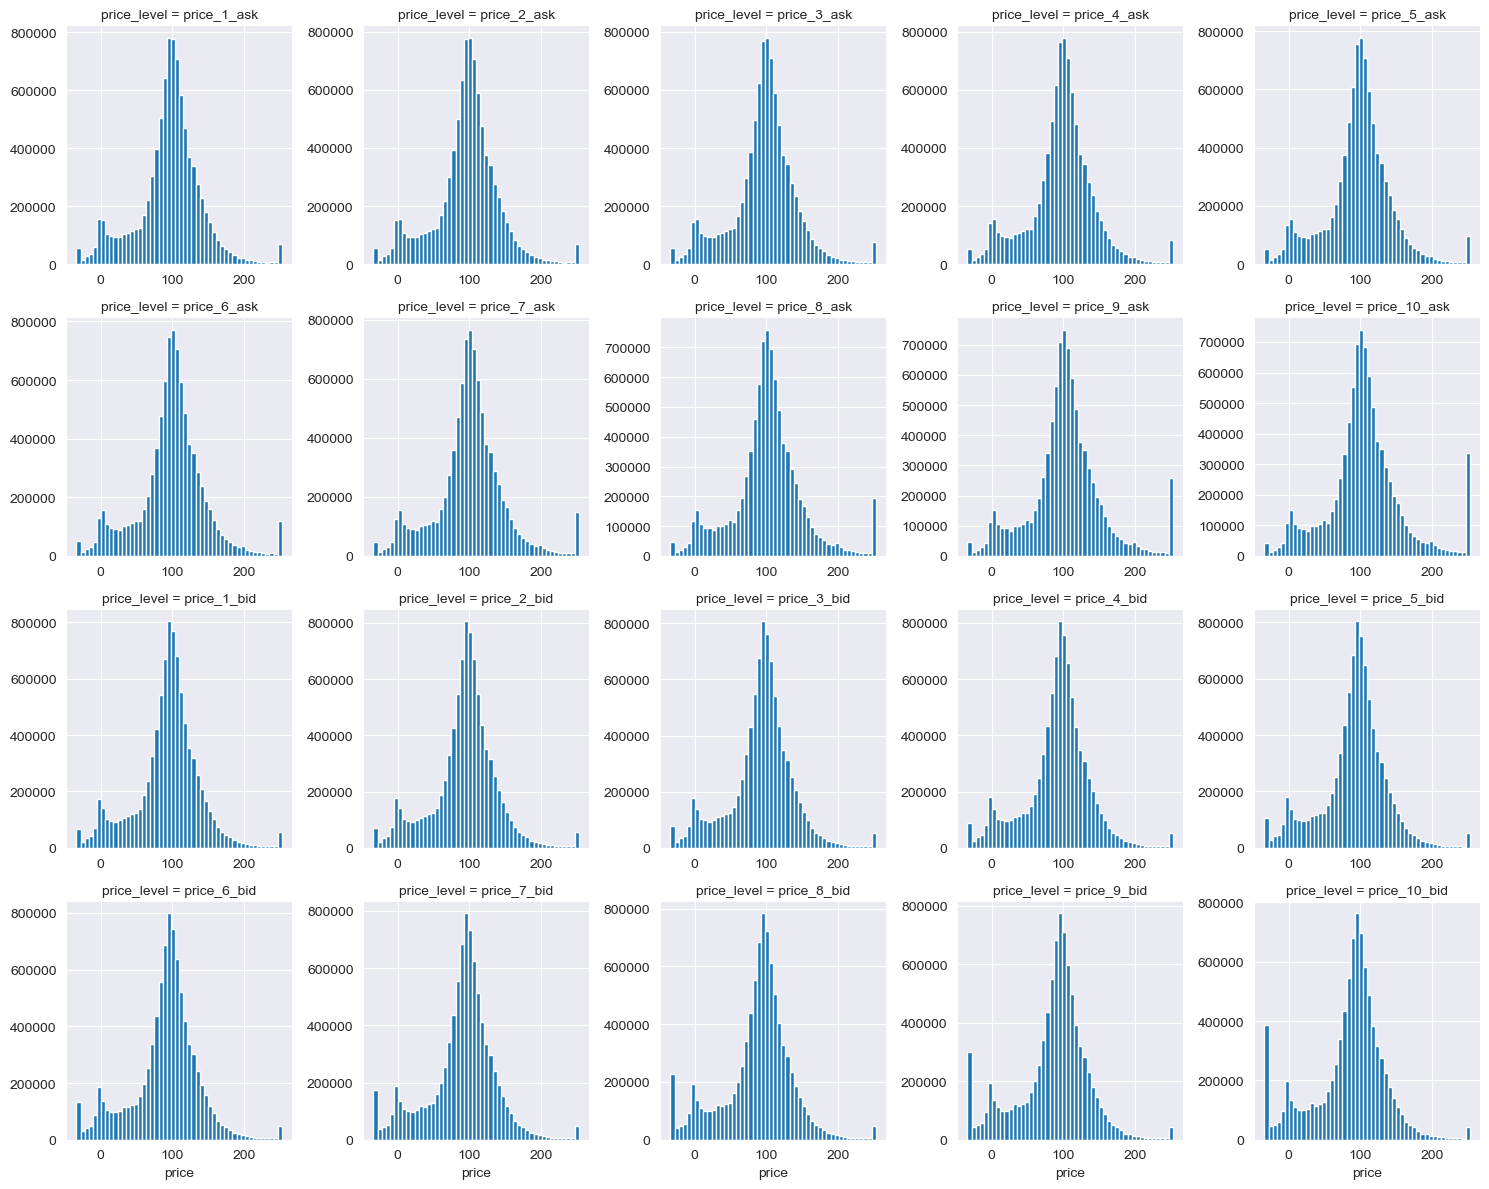

In [7]:
# plot facetgrid with hist of every price column
g = sns.FacetGrid(df_price_melted, col="price_level", col_wrap=5, sharex=False, sharey=False)
g.map(plt.hist, "price", bins=50)
plt.show()

In [8]:
# plot facetgrid with hist of every quantity column
df_quantity_melted = df.melt(id_vars=["snapshot_times", "delivery_start"],
                             value_vars=quantity_columns,
                             var_name="quantity_level",
                             value_name="quantity")

# winsorize the quantity column to remove extreme outliers
df_quantity_melted["quantity"] = df_quantity_melted["quantity"].clip(
    lower=df_quantity_melted["quantity"].quantile(0.01),
    upper=df_quantity_melted["quantity"].quantile(0.99))

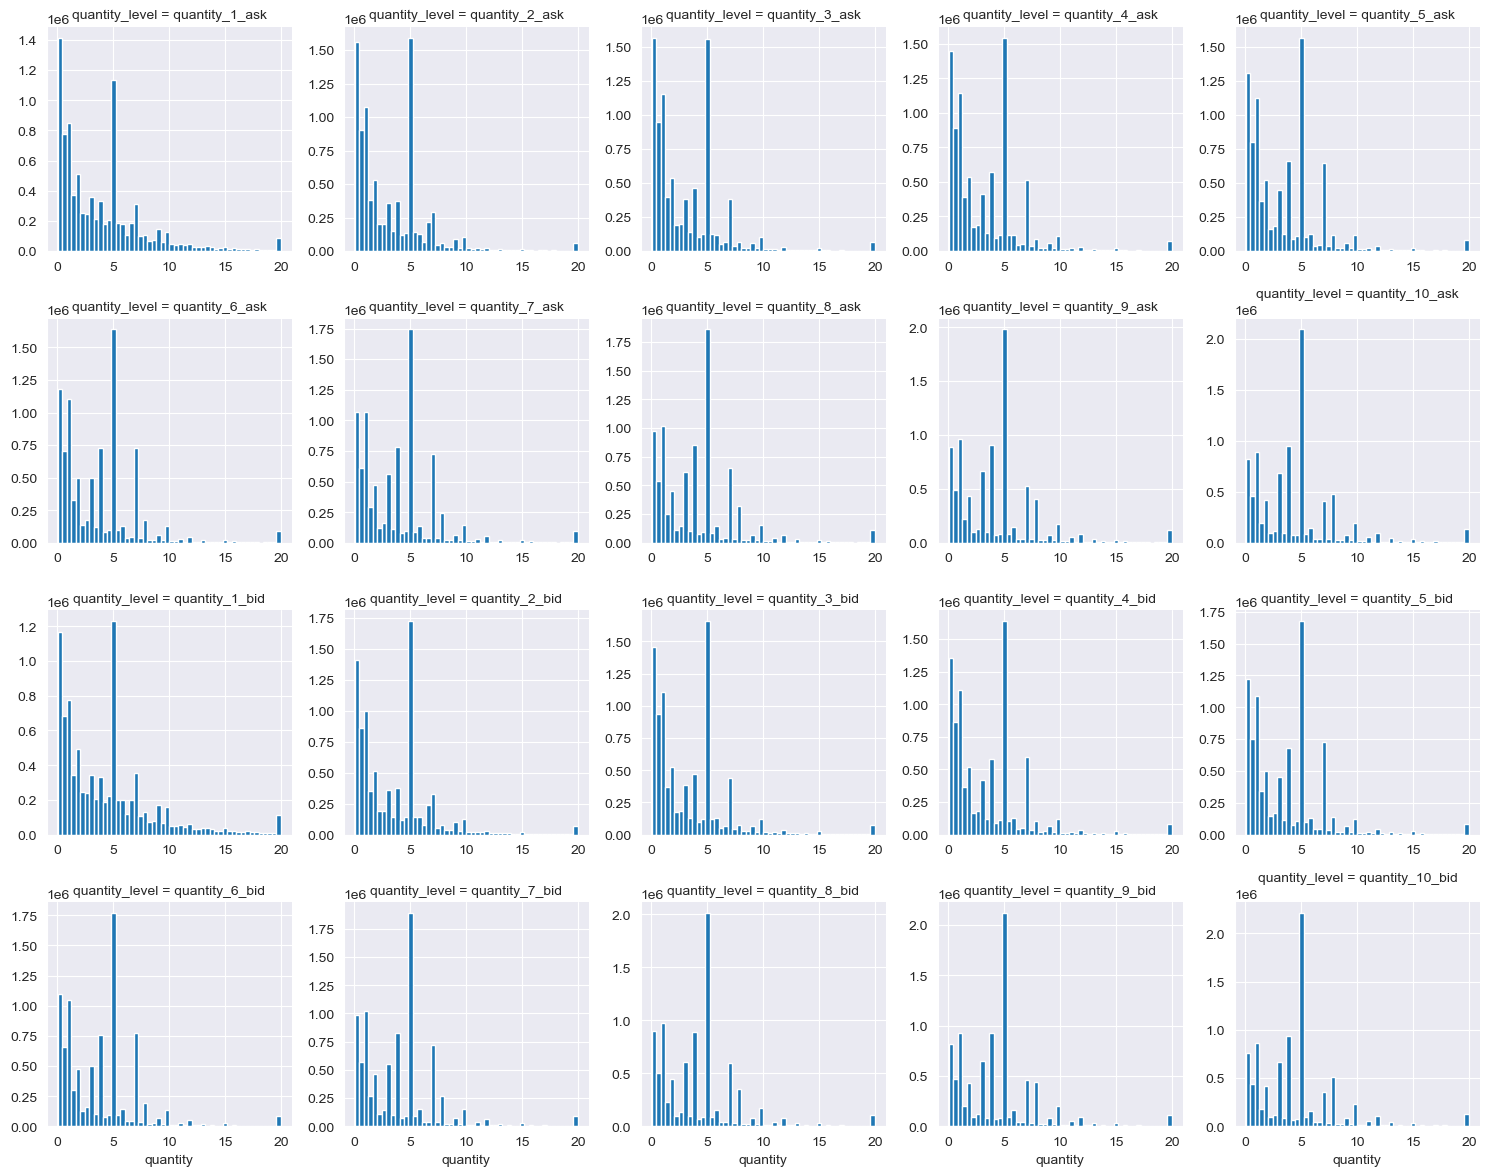

In [9]:
# plot facetgrid with hist of every price column
g = sns.FacetGrid(df_quantity_melted, col="quantity_level", col_wrap=5, sharex=False, sharey=False)
g.map(plt.hist, "quantity", bins=50)
plt.show()

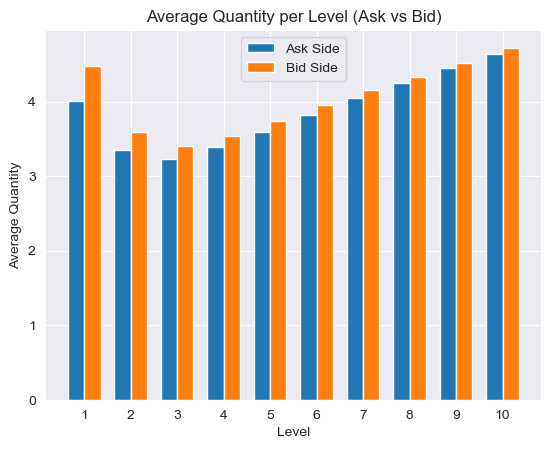

In [3]:
import numpy as np
import matplotlib.pyplot as plt

levels = np.arange(1, 11)
width = 0.35

# calculate average quantity per level for ask and bid side including NaN values
avg_ask = [df[f"quantity_{i}_ask"].mean() for i in levels]
avg_bid = [df[f"quantity_{i}_bid"].mean() for i in levels]

plt.bar(levels - width / 2, avg_ask, width, label="Ask Side")
plt.bar(levels + width / 2, avg_bid, width, label="Bid Side")
plt.xlabel("Level")
plt.ylabel("Average Quantity")
plt.title("Average Quantity per Level (Ask vs Bid)")
plt.legend()
plt.xticks(levels)
plt.show()


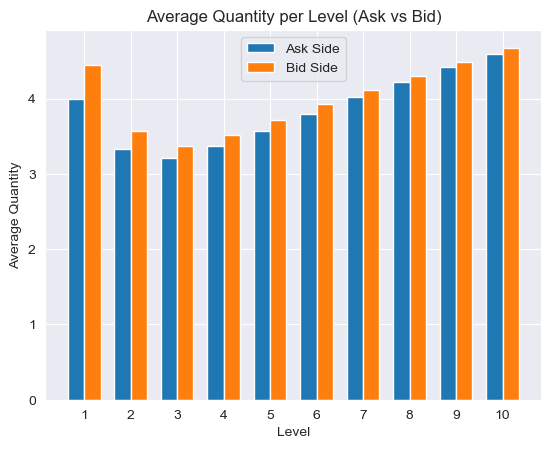

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  # Importiere pandas für die Datenmanipulation

# Annahme: 'df' ist dein DataFrame mit den pivotierten, aggregierten Snapshots,
# bei dem fehlende Level bereits mit NaN aufgefüllt wurden.
# Jede Zeile ist ein Snapshot. Die Spalten sind z.B. 'quantity_1_ask', 'quantity_1_bid', etc.


# --- KORRIGIERTE BERECHNUNG ---

# Erstelle eine Kopie, um das Original-DataFrame nicht zu verändern
df_for_plot = df.copy()

levels = np.arange(1, 11)
width = 0.35

# Berechne den unverzerrten Durchschnitt, indem NaN als 0 behandelt wird.
# df.fillna(0) ist der entscheidende Schritt zur Korrektur des Bias.
avg_ask = [df_for_plot[f"quantity_{i}_ask"].fillna(0).mean() for i in levels]
avg_bid = [df_for_plot[f"quantity_{i}_bid"].fillna(0).mean() for i in levels]

# --- PLOTTING (bleibt unverändert) ---
plt.bar(levels - width / 2, avg_ask, width, label="Ask Side")
plt.bar(levels + width / 2, avg_bid, width, label="Bid Side")
plt.xlabel("Level")
plt.ylabel("Average Quantity")
plt.title("Average Quantity per Level (Ask vs Bid)")
plt.legend()
plt.xticks(levels)
plt.show()

In [2]:
def analyze_empty_book_sides(df: pd.DataFrame, max_level: int = 10):
    """
    Analysiert einen DataFrame auf leere Buchseiten (bid oder ask) und gibt eine Zusammenfassung aus.

    Eine Seite gilt als "leer", wenn die Summe aller Quantitäten bis zur maximalen Tiefe
    Null ist. Die Funktion zählt das Vorkommen und listet die Indizes auf.

    Args:
        df (pd.DataFrame): Der zu analysierende DataFrame (ein Batch).
        max_level (int): Die maximale Tiefe des Orderbuchs, die überprüft werden soll.
    """
    print("\n" + "-" * 30)
    print("Analyse auf leere Buchseiten gestartet...")

    if df.empty:
        print("  -> DataFrame ist leer. Keine Analyse möglich.")
        return

    total_rows = len(df)
    print(f"  Gesamtanzahl der Snapshots im Batch: {total_rows:,}")

    # 1. Spalten für die Quantitäten generieren
    bid_qty_cols = [f'quantity_{i}_bid' for i in range(1, max_level + 1)]
    ask_qty_cols = [f'quantity_{i}_ask' for i in range(1, max_level + 1)]

    # Sicherstellen, dass die Spalten existieren
    missing_cols = [col for col in bid_qty_cols + ask_qty_cols if col not in df.columns]
    if missing_cols:
        print(f"  -> Warnung: Folgende Spalten fehlen und werden ignoriert: {missing_cols}")
        bid_qty_cols = [col for col in bid_qty_cols if col in df.columns]
        ask_qty_cols = [col for col in ask_qty_cols if col in df.columns]

    # 2. Summe der Quantitäten pro Seite berechnen (sum() behandelt NaNs als 0)
    total_bid_qty = df[bid_qty_cols].sum(axis=1)
    total_ask_qty = df[ask_qty_cols].sum(axis=1)

    # 3. Masken für leere Seiten erstellen
    empty_bid_mask = total_bid_qty == 0
    empty_ask_mask = total_ask_qty == 0
    empty_both_mask = empty_bid_mask & empty_ask_mask

    # 4. Zählen und Indizes extrahieren
    num_empty_bids = empty_bid_mask.sum()
    num_empty_asks = empty_ask_mask.sum()
    num_empty_both = empty_both_mask.sum()

    empty_bid_indices = df.index[empty_bid_mask]
    empty_ask_indices = df.index[empty_ask_mask]

    # --- 5. Ergebnisse ausgeben ---
    print("\n--- ERGEBNISSE ---")

    # Leere Bid-Seite
    if num_empty_bids > 0:
        percent_bid = (num_empty_bids / total_rows) * 100
        print(f"Leere Bid-Seiten gefunden: {num_empty_bids:,} ({percent_bid:.2f}%)")
        print(f"  -> Beispiel-Indizes: {list(empty_bid_indices[:5])}")
    else:
        print("Keine leeren Bid-Seiten gefunden.")

    # Leere Ask-Seite
    if num_empty_asks > 0:
        percent_ask = (num_empty_asks / total_rows) * 100
        print(f"Leere Ask-Seiten gefunden: {num_empty_asks:,} ({percent_ask:.2f}%)")
        print(f"  -> Beispiel-Indizes: {list(empty_ask_indices[:5])}")
    else:
        print("Keine leeren Ask-Seiten gefunden.")

    # Beide Seiten leer
    if num_empty_both > 0:
        percent_both = (num_empty_both / total_rows) * 100
        print(f"Beide Seiten gleichzeitig leer: {num_empty_both:,} ({percent_both:.2f}%)")

    print("-" * 30 + "\n")


analyze_empty_book_sides(df, max_level=10)






------------------------------
Analyse auf leere Buchseiten gestartet...
  Gesamtanzahl der Snapshots im Batch: 9,166,090

--- ERGEBNISSE ---
Leere Bid-Seiten gefunden: 57,281 (0.62%)
  -> Beispiel-Indizes: [9693, 9697, 9701, 9705, 9709]
Leere Ask-Seiten gefunden: 46,738 (0.51%)
  -> Beispiel-Indizes: [2405, 2409, 2413, 2417, 2421]
Beide Seiten gleichzeitig leer: 2,586 (0.03%)
------------------------------



In [21]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from pathlib import Path

INPUT_DIRECTORY = Path("../../../data/parquet/04-pivoted")
parquet_files = sorted(list(INPUT_DIRECTORY.glob("*.parquet")))
num_files = 139

# read all files and store in one dataframe
df = pd.concat(
    [pd.read_parquet(f) for f in
     tqdm(parquet_files[:(num_files if num_files else len(parquet_files))], desc="Lade Parquet-Dateien")],
    ignore_index=True)
print(f"Anzahl Zeilen: {len(df)}")  # 1152795704
print(f"Anzahl Spalten: {len(df.columns)}")  # 19


Lade Parquet-Dateien:   0%|          | 0/139 [00:00<?, ?it/s]

Anzahl Zeilen: 22344778
Anzahl Spalten: 42


In [23]:
# check for rows with for one level and side price but no quantity
# may detect one row multiple times if multiple levels are affected
suspect_rows = []
for level in range(1, 11):
    ask_price_col = f"price_{level}_ask"
    ask_qty_col = f"quantity_{level}_ask"
    bid_price_col = f"price_{level}_bid"
    bid_qty_col = f"quantity_{level}_bid"
    sus_ask = df[(df[ask_price_col].notna()) & (df[ask_qty_col].isna() | df[ask_qty_col] <= 0)]
    sus_bid = df[(df[bid_price_col].notna()) & (df[bid_qty_col].isna() | df[bid_qty_col] <= 0)]
    suspect_rows.append(sus_ask)
    suspect_rows.append(sus_bid)
suspect_df = pd.concat(suspect_rows)
print(f"Anzahl verdächtiger Zeilen: {len(suspect_df)}")

Anzahl verdächtiger Zeilen: 0


In [22]:
# deduplicate suspect rows
def check_invalid_quantities(df: pd.DataFrame) -> (int, pd.Series):
    """Prüft auf Level mit Preis, aber ohne valide Quantität."""
    invalid_mask = pd.Series(False, index=df.index)
    for i in range(1, 10 + 1):
        for side in ['bid', 'ask']:
            mask = df[f'price_{i}_{side}'].notna() & (
                    df[f'quantity_{i}_{side}'].isna() | (df[f'quantity_{i}_{side}'] <= 0))
            invalid_mask |= mask
    count = invalid_mask.sum()
    return count, invalid_mask


invalid_count, invalid_rows = check_invalid_quantities(df)
print(f"Anzahl der Zeilen mit ungültigen Quantitäten: {invalid_count}")

Anzahl der Zeilen mit ungültigen Quantitäten: 0
